<a href="https://colab.research.google.com/github/MohammadHammoudeh14/Anomaly-detection/blob/main/Anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What is an Anomaly?

An anomaly is a data point that significantly differs from other data points in a dataset. For example, consider a basketball team's heights. Most players might be around 6 to 7 feet tall, but then you find one player who's only 4 feet tall. That player would be considered an anomaly.

Why is Anomaly Detection Important?

In data science, anomaly detection identifies unusual data that deviates from the norm. These deviations, or "anomalies," are not just statistical quirks; they often signify critical incidents that demand attention.

**Hands-On: Simple Anomaly Detection with K-Means in sklearn**

In [1]:
# import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
# creat dataset with 3 centers
X_,y_ = make_blobs(n_samples=300, centers=3, random_state =321)
X = pd.DataFrame(X_, columns=['x1','x2'])
X.head()

,x1,x2
0,7.793419,-7.149916
1,8.783409,-9.979164
2,7.467731,1.424818
3,9.204612,-5.804796
4,10.242530,-3.605225


In [4]:
# apply Kmeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init=10, random_state =42)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [5]:
# making a dataframe copy of X for saving clusters
df = X.copy()
df['cluster'] = kmeans.predict(X)
df.head()

,x1,x2,cluster
0,7.793419,-7.149916,2
1,8.783409,-9.979164,2
2,7.467731,1.424818,1
3,9.204612,-5.804796,0
4,10.242530,-3.605225,0


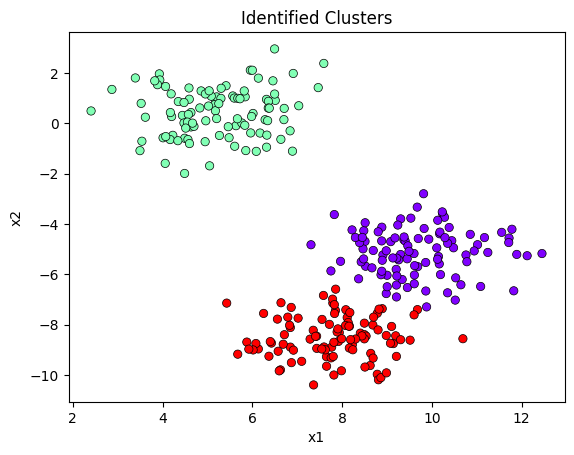

In [6]:
# plot the data data points and identified clusters
fig, ax= plt.subplots()
ax.scatter(df['x1'],df['x2'], c=df['cluster'], ec='black', lw=0.5,
           cmap='rainbow')
ax.set(xlabel='x1',ylabel='x2', title='Identified Clusters');

In [7]:
# saving the cluster centers as a dataframe for visibility
cluster_centers = pd.DataFrame(kmeans.cluster_centers_,columns=X.columns)
cluster_centers

,x1,x2
0,9.681187,-5.131638
1,5.218327,0.434833
2,7.809865,-8.512772


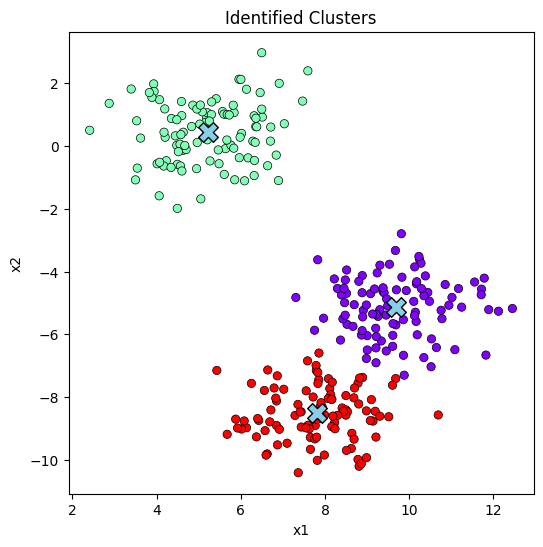

In [8]:
# Plot the data points and identified clusters
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df["x1"], df["x2"], c=df["cluster"], ec="black", lw=0.5, cmap="rainbow")
ax.set(xlabel="x1", ylabel="x2", title="Identified Clusters")
# Plot the cluster centers
centers = ax.scatter(
    cluster_centers["x1"],
    cluster_centers["x2"],
    color="skyblue",
    ec="black",
    s=200,
    marker="X",
);


Using scipy's  cdist to calculate distances

The cdist  function is a handy tool when dealing with distances between points in a dataset.

The cdist  function from the scipy.spatial.distance  library calculates the distance between each pair of points from two collections of points. So, if you have two sets of points ( A ) and ( B ), cdist  will tell you the distance from each point in ( A ) to each point in ( B ).

In [12]:
from scipy.spatial.distance import cdist
# calculate distance to each cluster center
distances = cdist(X, kmeans.cluster_centers_,'euclidean')

In [13]:
# Distances shape is (# rows, # clusters)
distances.shape

(300, 3)

In [14]:
# Compare to X (#rows, # features)
X.shape

(300, 2)

In [15]:
# Saving distances as a dataframe for convenience
cluter_cols = [f"Distance (Cluster {c})" for  c in range(len(kmeans.cluster_centers_))]
distance_df = pd.DataFrame(distances, columns = cluter_cols)
distance_df.head(3)

,Distance (Cluster 0),Distance (Cluster 1),Distance (Cluster 2)
0,2.763533,8.009963,1.362955
1,4.929960,11.007322,1.760140
2,6.920007,2.457618,9.943477


In [16]:
# Get the minimum distance to any cluster for each point
min_distances = np.min(distances, axis=1)
# Display first 5 values
min_distances[:5]

array([1.36295536, 1.76013984, 2.45761801, 0.82478221, 1.62635919])

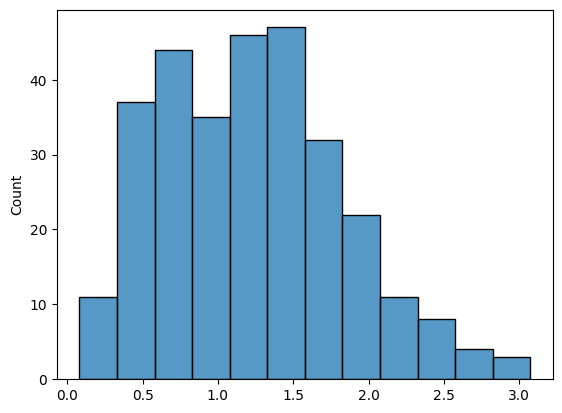

In [17]:
# distance from closet centroid
ax = sns.histplot(min_distances)


In [18]:
# Set a threshold based on a percentile
threshold = np.percentile(min_distances, 95)
threshold

np.float64(2.299876112245027)

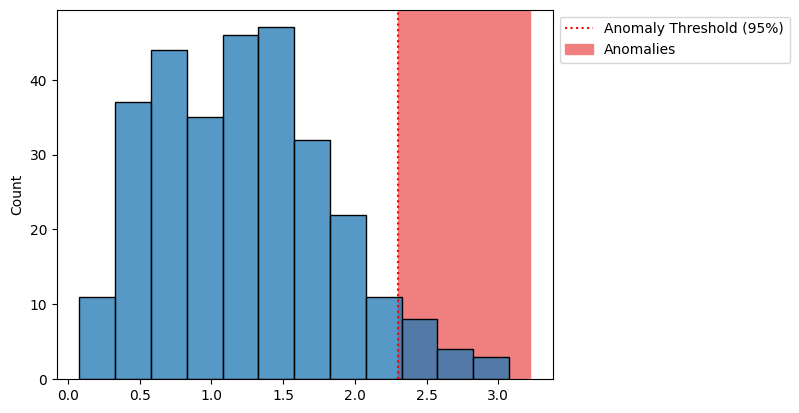

In [19]:
# Visualize the distribution of distances and the anomaly threshold.
ax = sns.histplot(min_distances)
ax.axvline(threshold, color='red', ls=':', label='Anomaly Threshold (95%)')
ax.axvspan(threshold, ax.get_xlim()[1], color='lightcoral',zorder=0, label='Anomalies')
ax.legend(bbox_to_anchor=[1,1]);

In [20]:
# Identify anomalies where the distance to closest cluster center is above the threshold
filter_anomalies = min_distances > threshold
# how many were found?
filter_anomalies.sum()

np.int64(15)

In [21]:
# Getting the row indices of the anomalies
idx_anomalies = X[filter_anomalies].index
idx_anomalies

Index([2, 68, 87, 88, 94, 97, 105, 123, 161, 189, 200, 228, 244, 263, 276], dtype='int64')

In [22]:
# Slicing the anomalies from X (for demonstration)
X.iloc[idx_anomalies]

,x1,x2
2,7.467731,1.424818
68,11.823414,-6.658463
87,9.814531,-2.796309
88,7.826284,-3.624850
94,5.429257,-7.147623
97,12.452401,-5.176033
105,10.690949,-8.563954
123,7.306840,-4.825578
161,6.495709,2.963979
189,12.122039,-5.262365


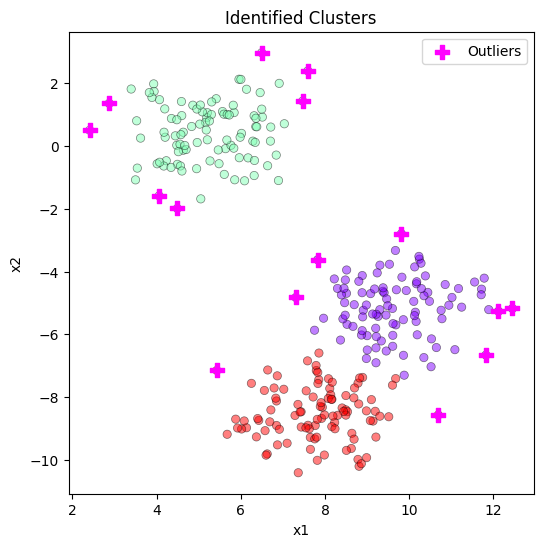

In [23]:
# Plot the data points and identified clusters
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(
    df["x1"], df["x2"], c=df["cluster"], ec="black", lw=0.5, cmap="rainbow", alpha=0.5
)
ax.set(xlabel="x1", ylabel="x2", title="Identified Clusters")
## Plotting the anomalies for visibility.
X.iloc[idx_anomalies].plot(
    x="x1", y="x2", kind="scatter", color="magenta", label="Outliers", ax=ax, marker='P',s=100,
);
